In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Documento CSV de Acidentes 2025 (Agrupados por ocorrência)
df_2025_ocorrencia = pd.read_csv("dados/acidentes/por ocorrencia/datatran_agrupado.csv", sep=",")
df_2025_ocorrencia.head()


C:\Users\adria\AppData\Local\Temp\ipykernel_12464\516691741.py:2: DtypeWarning: Columns (25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2025_ocorrencia = pd.read_csv("dados/acidentes/por ocorrencia/datatran_agrupado.csv", sep=",")


,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop,origem_arquivo
0,405151.0,2022-01-01,sábado,01:35:00,PI,316,415,MARCOLANDIA,Ingestão de álcool pelo condutor,Colisão traseira,...,1,1,1,3,"-7,43280012","-40,68261908",SPRF-PI,DEL04-PI,UOP03-DEL04-PI,datatran2022.csv
1,405158.0,2022-01-01,sábado,02:40:00,PR,116,33,CAMPINA GRANDE DO SUL,Ingestão de álcool pelo condutor,Tombamento,...,0,1,1,2,"-25,114403","-48,8467554",SPRF-PR,DEL01-PR,UOP02-DEL01-PR,datatran2022.csv
2,405172.0,2022-01-01,sábado,05:22:00,MS,163,393,NOVA ALVORADA DO SUL,Condutor deixou de manter distância do veículo...,Colisão traseira,...,1,1,1,3,"-21,228445","-54,456296",SPRF-MS,DEL02-MS,UOP01-DEL02-MS,datatran2022.csv
3,405203.0,2022-01-01,sábado,07:00:00,RJ,101,457,ANGRA DOS REIS,Reação tardia ou ineficiente do condutor,Colisão frontal,...,1,0,1,2,"-23,03149804","-44,17715297",SPRF-RJ,DEL03-RJ,UOP03-DEL03-RJ,datatran2022.csv
4,405207.0,2022-01-01,sábado,09:00:00,MG,40,"508,3",RIBEIRAO DAS NEVES,Acumulo de água sobre o pavimento,Saída de leito carroçável,...,3,0,0,1,"-19,76061249","-44,1347544",SPRF-MG,DEL02-MG,UOP01-DEL02-MG,datatran2022.csv


In [12]:
ufs = ['RS', 'SC', 'PR']

In [14]:
df_2025_ocorrencia = df_2025_ocorrencia[df_2025_ocorrencia['uf'].isin(ufs)]

In [28]:
df_2025_ocorrencia.columns

Index(['id', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br', 'km',
       'municipio', 'causa_acidente', 'tipo_acidente',
       'classificacao_acidente', 'fase_dia', 'sentido_via',
       'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo',
       'pessoas', 'mortos', 'feridos_leves', 'feridos_graves', 'ilesos',
       'ignorados', 'feridos', 'veiculos', 'latitude', 'longitude', 'regional',
       'delegacia', 'uop', 'origem_arquivo', 'ano'],
      dtype='object')

C:\Users\adria\AppData\Local\Temp\ipykernel_12464\978963970.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


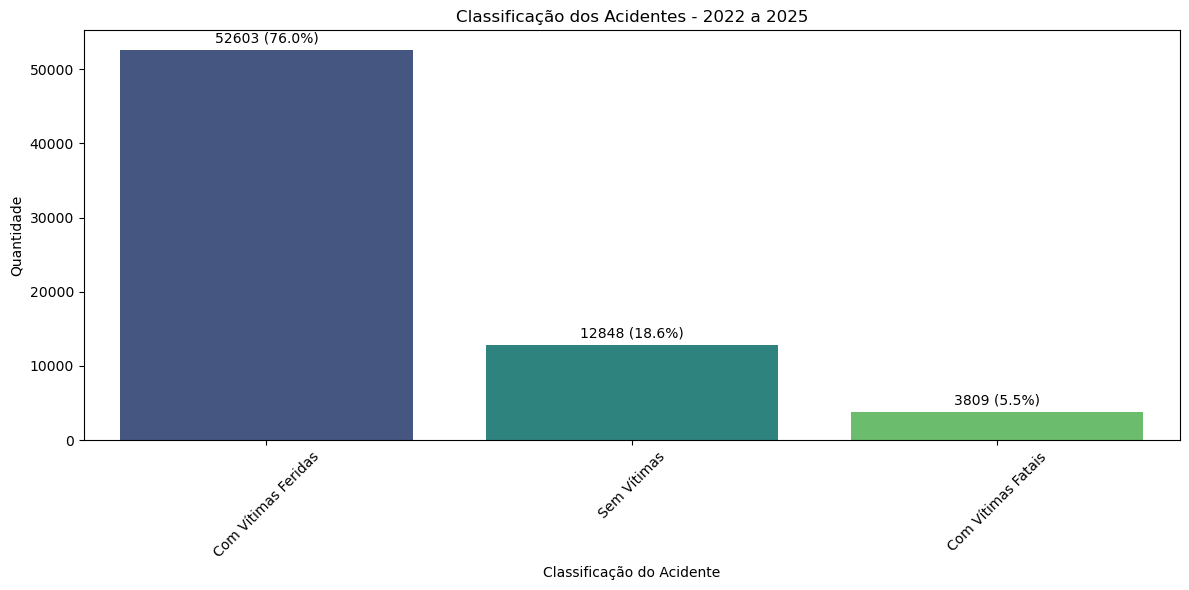

In [16]:
# Contagem e percentual
classificacoes = df_2025_ocorrencia['classificacao_acidente'].value_counts().reset_index()
classificacoes.columns = ['classificacao_acidente', 'quantidade']
classificacoes['percentual'] = 100 * classificacoes['quantidade'] / classificacoes['quantidade'].sum()

# Ordena por quantidade (opcional)
classificacoes = classificacoes.sort_values('quantidade', ascending=False).reset_index(drop=True)

# Paleta Viridis
cores_viridis = sns.color_palette("viridis", n_colors=len(classificacoes))

# Plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=classificacoes,
    x='classificacao_acidente',
    y='quantidade',
    palette=cores_viridis
)

# Anotações
for i, row in classificacoes.iterrows():
    texto = f"{row['quantidade']} ({row['percentual']:.1f}%)"
    ax.text(i, row['quantidade'] + max(classificacoes['quantidade']) * 0.01, texto,
            ha='center', va='bottom', fontsize=10, color='black')

# Títulos e eixos
plt.title('Classificação dos Acidentes - 2022 a 2025')
plt.xlabel('Classificação do Acidente')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Quantidade de acidentes com vítimas fatais

In [17]:
# Filtra apenas os acidentes com vítimas fatais
fatais = df_2025_ocorrencia[df_2025_ocorrencia['classificacao_acidente'] == 'Com Vítimas Fatais']

# Agrupa por rodovia e conta quantas ocorrências há
resultado = fatais.groupby('br').size().reset_index(name='qtd_acidentes_fatais')

# Ordena do maior pro menor (opcional)
resultado = resultado.sort_values(by='br', ascending=True)

# Exibe o resultado
print(resultado)


     br  qtd_acidentes_fatais
0     0                     3
1   101                   444
2   116                   405
3   153                   151
4   158                    84
5   163                    98
6   272                    20
7   277                   506
8   280                   118
9   282                   272
10  285                   115
11  287                    22
12  290                   124
13  293                    37
14  369                   188
15  373                   107
16  376                   349
17  386                   149
18  392                    95
19  448                     8
20  467                     8
21  468                    20
22  469                     1
23  470                   270
24  471                    25
25  472                    41
26  476                   127
27  480                     7
28  487                    15


C:\Users\adria\AppData\Local\Temp\ipykernel_12464\3015315658.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=resultado, x='br', y='qtd_acidentes_fatais', palette=cores_viridis)


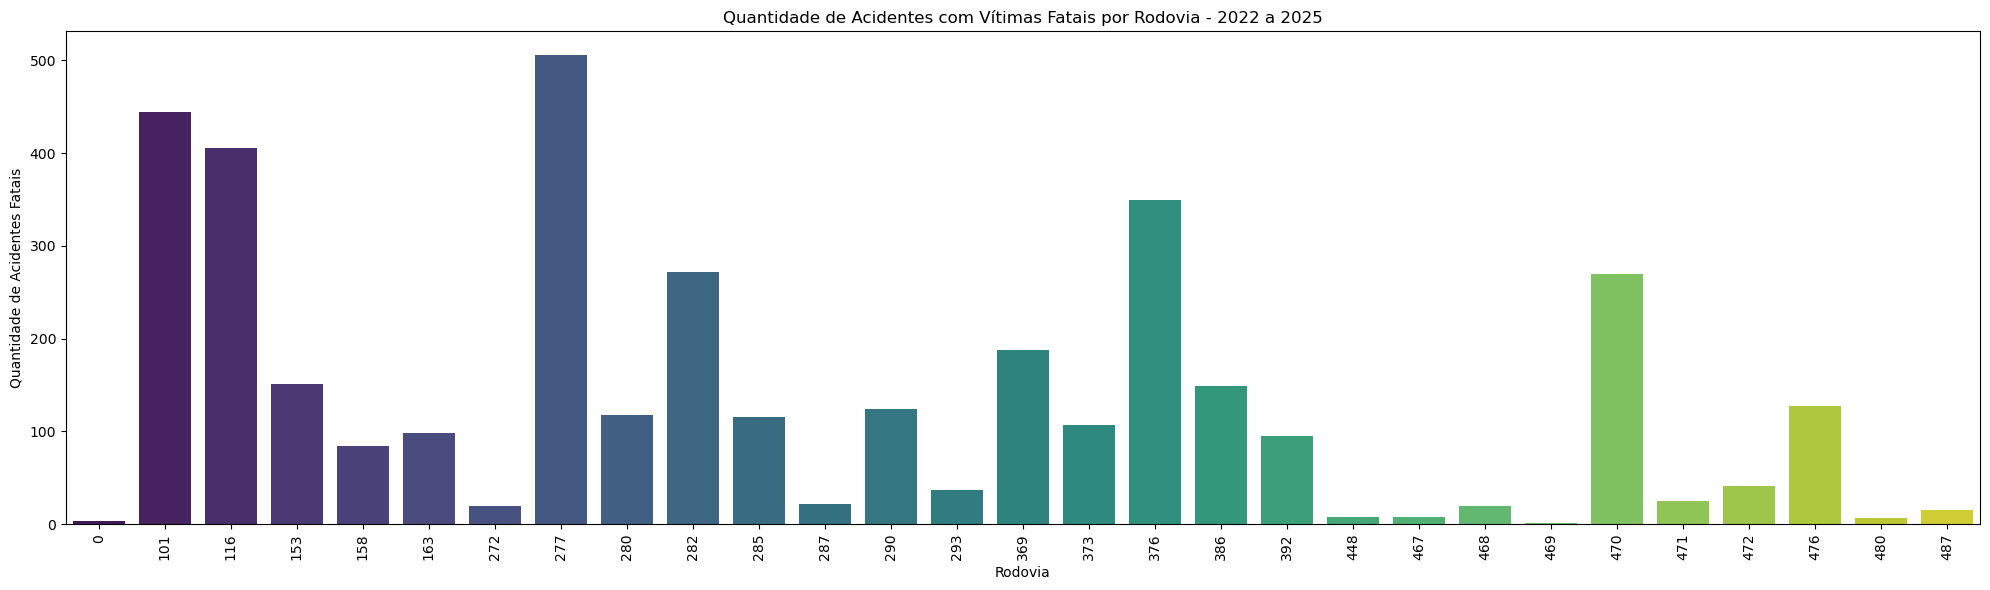

In [18]:
# Ordena os dados para consistência visual (opcional)
resultado = resultado.sort_values('qtd_acidentes_fatais', ascending=False)

# Cria a paleta Viridis com o número de cores igual ao número de barras
cores_viridis = sns.color_palette("viridis", n_colors=len(resultado))

plt.figure(figsize=(20, 6))
sns.barplot(data=resultado, x='br', y='qtd_acidentes_fatais', palette=cores_viridis)

plt.title('Quantidade de Acidentes com Vítimas Fatais por Rodovia - 2022 a 2025')
plt.xlabel('Rodovia')
plt.ylabel('Quantidade de Acidentes Fatais')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Causa de acidentes

In [19]:
df_2025_ocorrencia['causa_acidente'].value_counts()

causa_acidente
Reação tardia ou ineficiente do condutor                     10406
Ausência de reação do condutor                                9008
Acessar a via sem observar a presença dos outros veículos     7007
Velocidade Incompatível                                       4970
Ingestão de álcool pelo condutor                              4959
                                                             ...  
Faróis desregulados                                              5
Redutor de velocidade em desacordo                               5
Obstrução Via tentativa Assalto                                  3
Sistema de drenagem ineficiente                                  2
Sinalização encoberta                                            1
Name: count, Length: 76, dtype: int64

C:\Users\adria\AppData\Local\Temp\ipykernel_12464\3745305500.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=causas_df, x='indice', y='quantidade', palette=viridis_cores, ax=ax1)


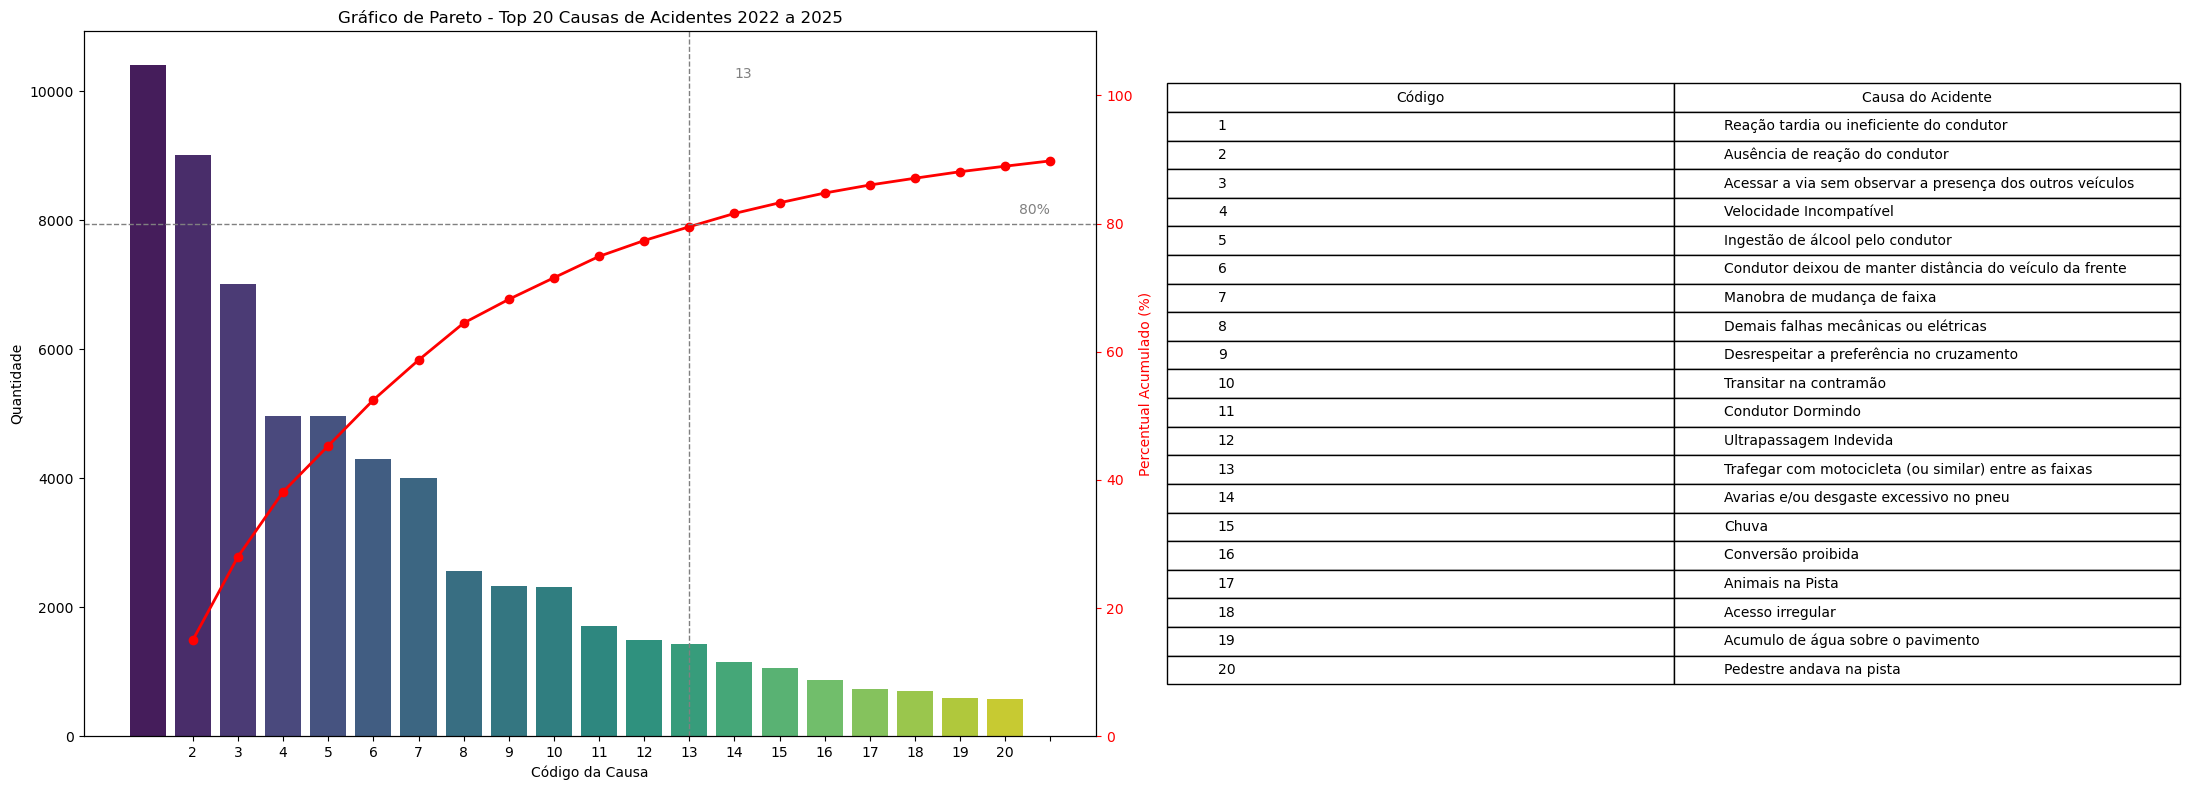

In [20]:
import matplotlib.gridspec as gridspec

# Agrupamento e cálculo
causas_df = df_2025_ocorrencia['causa_acidente'].value_counts().reset_index()
causas_df.columns = ['causa_acidente', 'quantidade']
causas_df['percentual'] = 100 * causas_df['quantidade'].cumsum() / causas_df['quantidade'].sum()

# Limita para as 20 principais causas
causas_df = causas_df.head(20).copy()
causas_df['indice'] = range(1, len(causas_df) + 1)

# Posição onde atinge 80%
idx_80 = causas_df[causas_df['percentual'] >= 80].index[0]
causa_80 = causas_df['indice'][idx_80]

# Paleta viridis
viridis_cores = sns.color_palette("viridis", n_colors=len(causas_df))

# Layout com duas colunas: gráfico e tabela
fig = plt.figure(figsize=(22, 8))
gs = gridspec.GridSpec(1, 2, width_ratios=[4, 4])  # Gráfico maior que tabela

# Gráfico Pareto na esquerda
ax1 = plt.subplot(gs[0])
sns.barplot(data=causas_df, x='indice', y='quantidade', palette=viridis_cores, ax=ax1)
ax1.set_xlabel('Código da Causa')
ax1.set_ylabel('Quantidade', color='black')
ax1.tick_params('y', colors='black')
ax1.set_xticks(causas_df['indice'])

# Curva acumulada
ax2 = ax1.twinx()
ax2.plot(causas_df['indice'], causas_df['percentual'], color='red', marker='o', linewidth=2)
ax2.set_ylabel('Percentual Acumulado (%)', color='red')
ax2.tick_params('y', colors='red')
ax2.set_ylim(0, 110)

# Linhas de referência
ax2.axhline(80, color='gray', linestyle='--', linewidth=1)
ax2.text(len(causas_df), 81, '80%', color='gray', ha='right', va='bottom')
ax1.axvline(causa_80 - 1, color='gray', linestyle='--', linewidth=1)
ax1.text(causa_80, ax1.get_ylim()[1]*0.95, f'{causa_80}', rotation=0, color='gray', va='top')

ax1.set_title('Gráfico de Pareto - Top 20 Causas de Acidentes 2022 a 2025')

# Tabela na direita
ax_table = plt.subplot(gs[1])
ax_table.axis('off')

# Conteúdo da tabela
tabela_data = [[row['indice'], row['causa_acidente']] for _, row in causas_df.iterrows()]
table = ax_table.table(
    cellText=tabela_data,
    colLabels=["Código", "Causa do Acidente"],
    cellLoc='left',
    loc='center'
)

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.0, 1.5)

plt.tight_layout()
plt.show()

# Dia da semana do acidente

In [21]:
df_2025_ocorrencia['dia_semana'].value_counts()

dia_semana
sábado           11510
domingo          11240
sexta-feira      10928
segunda-feira     9261
quinta-feira      9108
quarta-feira      8689
terça-feira       8525
Name: count, dtype: int64

C:\Users\adria\AppData\Local\Temp\ipykernel_12464\353653837.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=dias, x='dia_semana', y='quantidade', palette=cores_viridis)


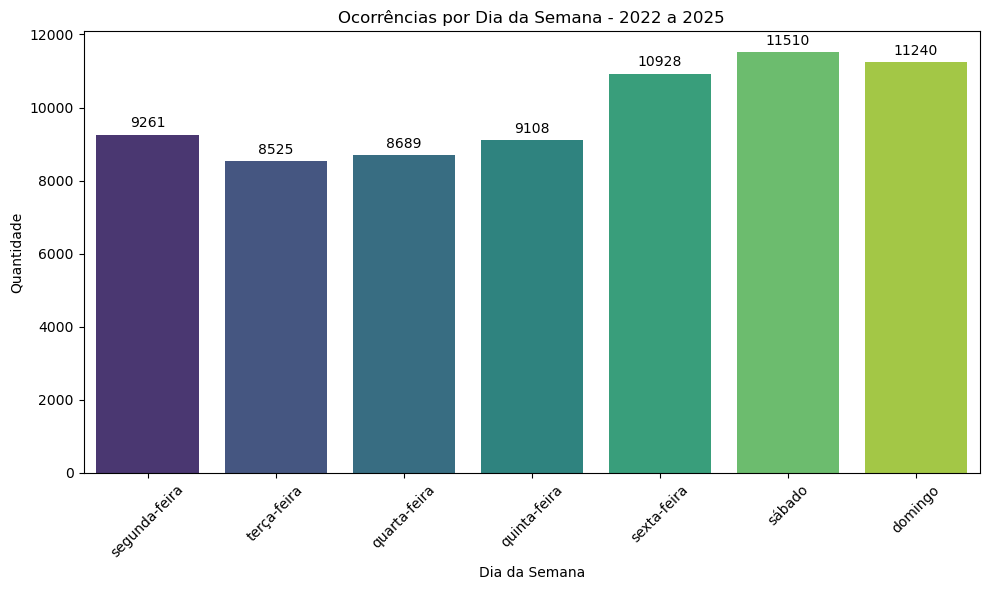

In [22]:
# Contagem por dia da semana
dias = df_2025_ocorrencia['dia_semana'].value_counts().reset_index()
dias.columns = ['dia_semana', 'quantidade']

# Ordena manualmente pelos dias da semana
ordem_dias = ['segunda-feira', 'terça-feira', 'quarta-feira', 'quinta-feira', 'sexta-feira', 'sábado', 'domingo']
dias['dia_semana'] = pd.Categorical(dias['dia_semana'], categories=ordem_dias, ordered=True)
dias = dias.sort_values('dia_semana').reset_index(drop=True)  # Reseta índice após ordenação

# Cria paleta Viridis para o número correto de barras
cores_viridis = sns.color_palette("viridis", n_colors=len(dias))

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=dias, x='dia_semana', y='quantidade', palette=cores_viridis)

plt.title('Ocorrências por Dia da Semana - 2022 a 2025')
plt.xlabel('Dia da Semana')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)

# Agora o índice 'i' vai de 0 a len(dias)-1, exatamente a posição das barras no gráfico
for i, row in dias.iterrows():
    ax.text(i, row['quantidade'] + max(dias['quantidade']) * 0.01,
            f"{row['quantidade']}",
            ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

C:\Users\adria\AppData\Local\Temp\ipykernel_12464\922694504.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2025_ocorrencia['ano'] = pd.to_datetime(df_2025_ocorrencia['data_inversa']).dt.year


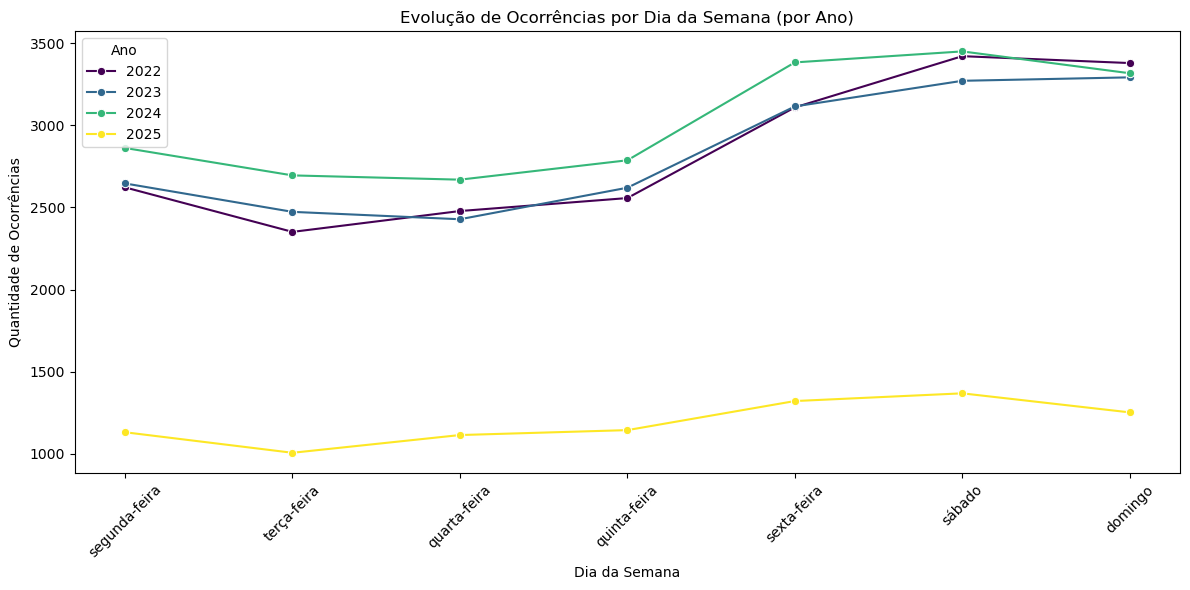

In [23]:
# Converte a data e extrai o ano
df_2025_ocorrencia['ano'] = pd.to_datetime(df_2025_ocorrencia['data_inversa']).dt.year

# Agrupamento por ano e dia da semana
evolucao = df_2025_ocorrencia.groupby(['ano', 'dia_semana']).size().reset_index(name='quantidade')

# Ordena os dias da semana corretamente
ordem_dias = ['segunda-feira', 'terça-feira', 'quarta-feira', 'quinta-feira', 'sexta-feira', 'sábado', 'domingo']
evolucao['dia_semana'] = pd.Categorical(evolucao['dia_semana'], categories=ordem_dias, ordered=True)
evolucao = evolucao.sort_values(['ano', 'dia_semana'])

# Gráfico de linha com cores Viridis
plt.figure(figsize=(12, 6))
sns.lineplot(data=evolucao, x='dia_semana', y='quantidade', hue='ano', marker='o', palette='viridis')

plt.title('Evolução de Ocorrências por Dia da Semana (por Ano)')
plt.xlabel('Dia da Semana')
plt.ylabel('Quantidade de Ocorrências')
plt.xticks(rotation=45)
plt.legend(title='Ano')
plt.tight_layout()
plt.show()

# UF acidentes

In [24]:
df_2025_ocorrencia['uf'].value_counts()

uf
SC    27038
PR    25100
RS    17123
Name: count, dtype: int64

# heatmap acidentes UF e BR

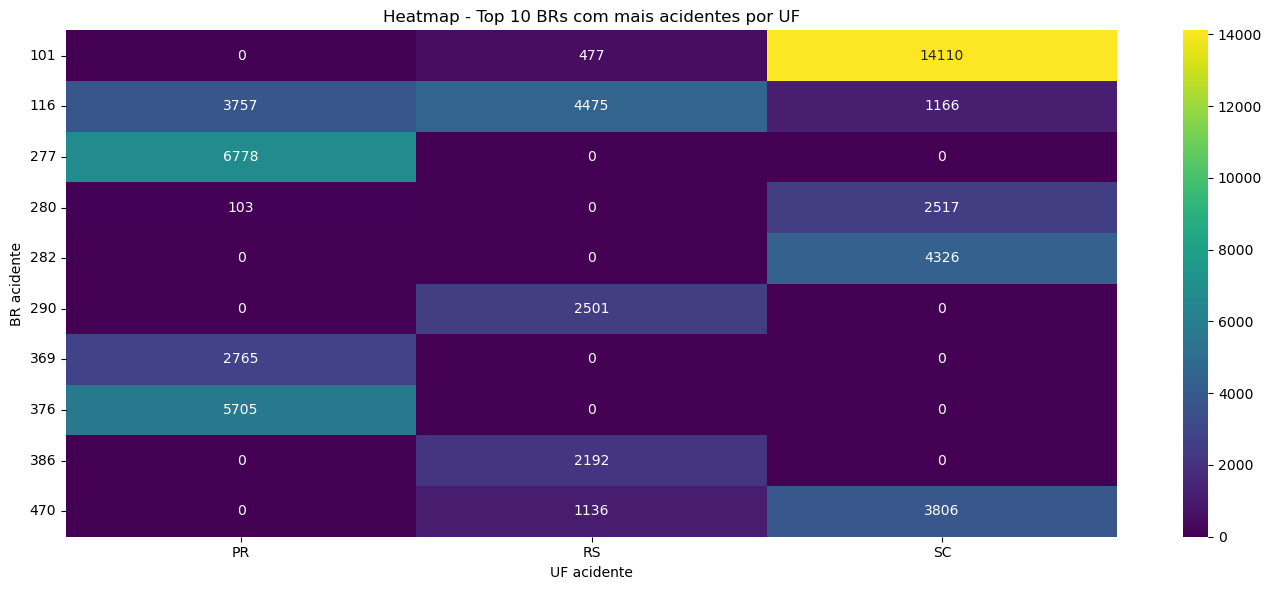

In [25]:
# Agrupamento por BR e UF
agrupado = df_2025_ocorrencia.groupby(['br', 'uf']).size().reset_index(name='quantidade')

# Filtra as 10 BRs com mais infrações totais
top_brs = (
    agrupado.groupby('br')['quantidade']
    .sum()
    .nlargest(10)
    .index
)
filtrado = agrupado[agrupado['br'].isin(top_brs)]

pivot_df = filtrado.pivot(index='br', columns='uf', values='quantidade').fillna(0)

plt.figure(figsize=(14, 6))
sns.heatmap(pivot_df, annot=True, fmt='g', cmap='viridis')

plt.title('Heatmap - Top 10 BRs com mais acidentes por UF')
plt.xlabel('UF acidente')
plt.ylabel('BR acidente')
#plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# tipo de acidente

In [26]:
df_2025_ocorrencia['tipo_acidente'].value_counts()

tipo_acidente
Colisão traseira                  12801
Saída de leito carroçável         11884
Colisão transversal               10425
Colisão lateral mesmo sentido      7794
Colisão com objeto                 5517
Tombamento                         5335
Colisão frontal                    4619
Atropelamento de Pedestre          2501
Queda de ocupante de veículo       2204
Colisão lateral sentido oposto     1786
Capotamento                        1219
Incêndio                           1157
Engavetamento                      1107
Atropelamento de Animal             590
Eventos atípicos                    212
Derramamento de carga               109
Sinistro pessoal de trânsito          1
Name: count, dtype: int64

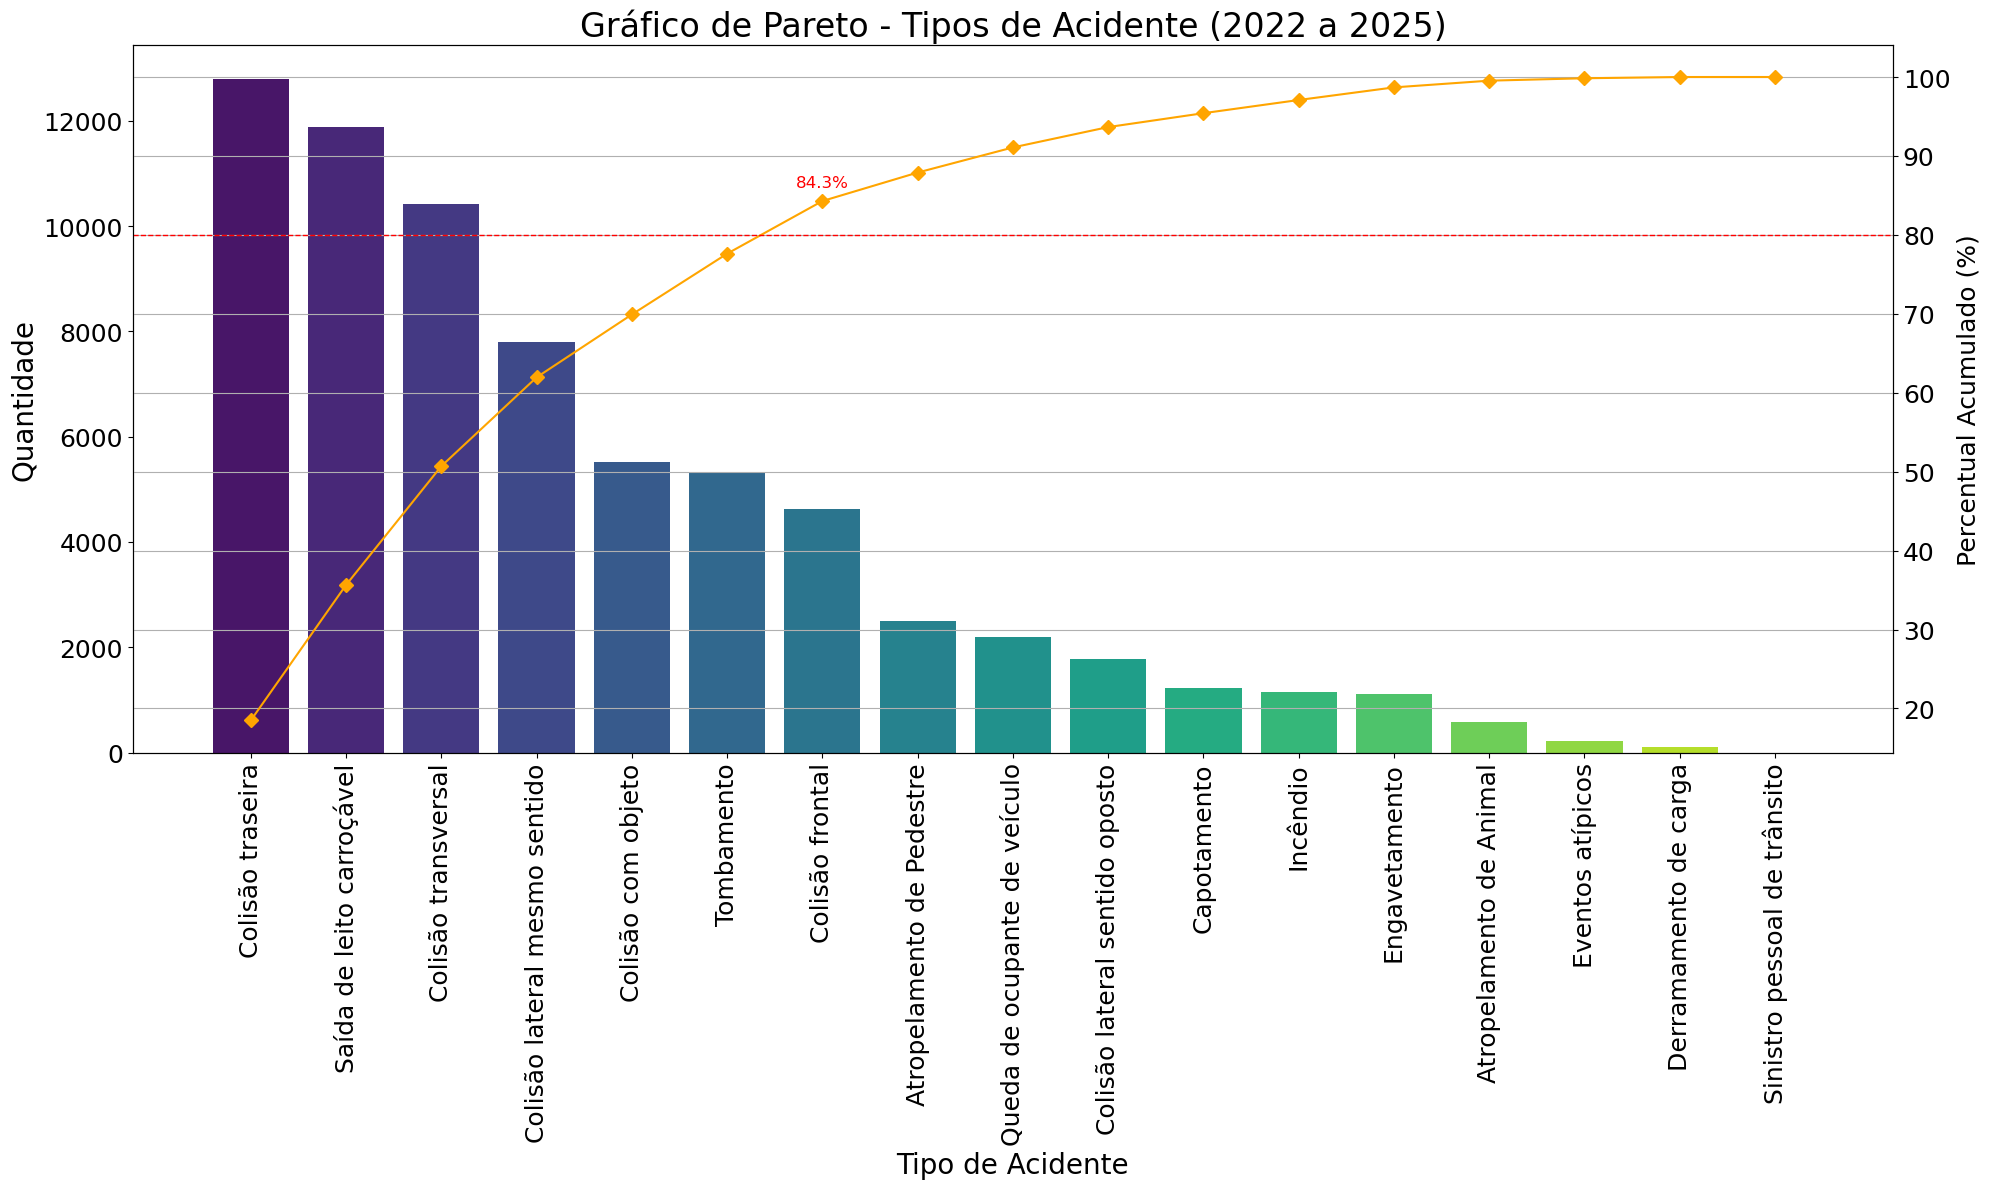

In [27]:
# Agrupamento
vc = df_2025_ocorrencia['tipo_acidente'].value_counts()
pareto_df = vc.reset_index()
pareto_df.columns = ['tipo_acidente', 'quantidade']

pareto_df['percent'] = 100 * pareto_df['quantidade'] / pareto_df['quantidade'].sum()
pareto_df['percent_acumulado'] = pareto_df['percent'].cumsum()

# Paleta viridis
viridis_colors = sns.color_palette("viridis", n_colors=len(pareto_df))

fig, ax = plt.subplots(figsize=(20, 12))

# Barras com viridis
ax.bar(range(len(pareto_df)), pareto_df['quantidade'], color=viridis_colors)

# Linha do percentual acumulado
ax2 = ax.twinx()
ax2.plot(range(len(pareto_df)), pareto_df['percent_acumulado'], color='orange', marker='D', ms=7)
ax2.axhline(80, color='red', linestyle='--', linewidth=1)
ax2.set_ylabel('Percentual Acumulado (%)', fontsize=18)
ax2.tick_params(axis='y', labelsize=18)

# Eixos e título
ax.set_xlabel('Tipo de Acidente', fontsize=20)
ax.set_ylabel('Quantidade', fontsize=20)
ax.set_title('Gráfico de Pareto - Tipos de Acidente (2022 a 2025)', fontsize=24)

# Eixo X
ax.set_xticks(range(len(pareto_df)))
ax.set_xticklabels(pareto_df['tipo_acidente'], rotation=90, fontsize=18)
ax.tick_params(axis='y', labelsize=18)

plt.grid(axis='y')

# Anotação onde o acumulado ultrapassa 80%
for i, perc in enumerate(pareto_df['percent_acumulado']):
    if perc >= 80:
        ax2.annotate(f'{perc:.1f}%', (i, perc), textcoords="offset points",
                     xytext=(0, 10), ha='center', color='red', fontsize=12)
        break  # Apenas o primeiro ponto ≥ 80%

plt.tight_layout()
plt.show()

# Gráfico de distribuição

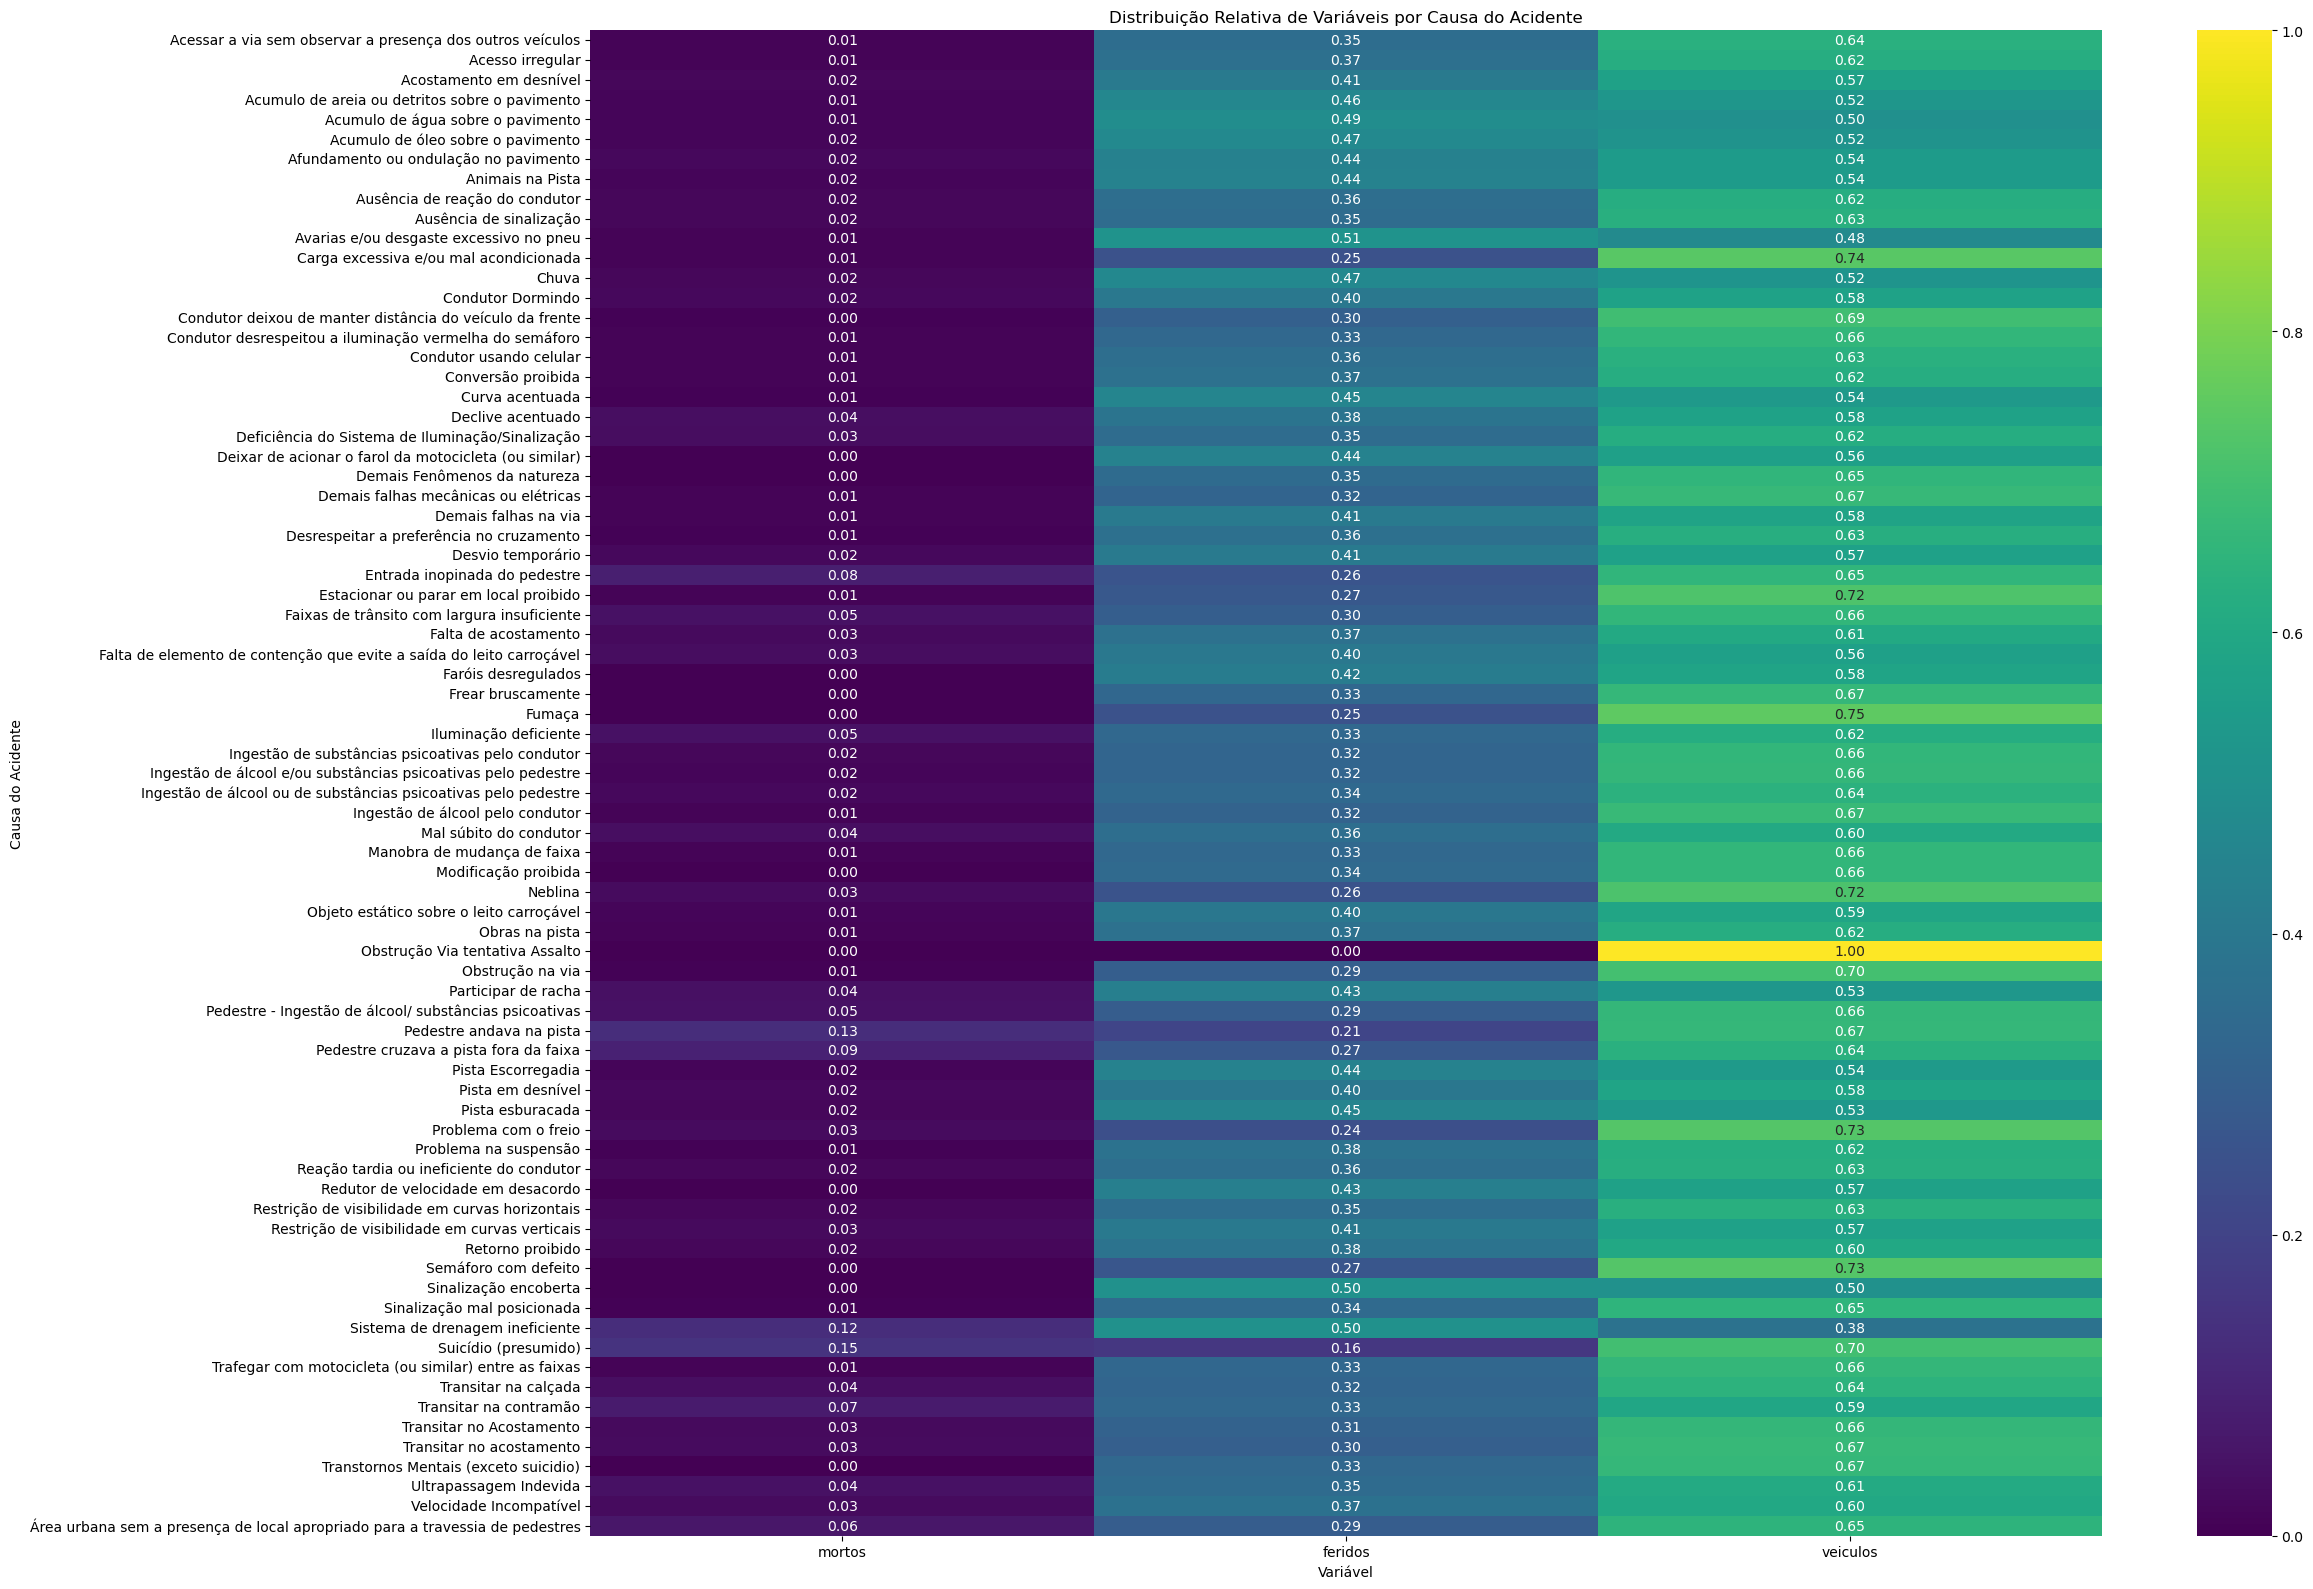

In [41]:
# Agrupar dados e normalizar para melhor visualização
heatmap_data = df_2025_ocorrencia.groupby('causa_acidente')[['mortos', 'feridos', 'veiculos']].sum()
heatmap_data = heatmap_data.div(heatmap_data.sum(axis=1), axis=0)  # normaliza linha

# Heatmap
plt.figure(figsize=(25, 16))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".2f")
plt.title('Distribuição Relativa de Variáveis por Causa do Acidente')
plt.xlabel('Variável')
plt.ylabel('Causa do Acidente')
plt.tight_layout()
plt.show()

# Verificando as infrações de 2025

In [2]:
# Documento CSV de Acidentes 2025 (Agrupados por pessoa)
df_2025_infra_01 = pd.read_csv("dados/infracoes/combined_output.csv", sep=";")
df_2025_infra_01.head()

C:\Users\adria\AppData\Local\Temp\ipykernel_12464\2091776849.py:2: DtypeWarning: Columns (15,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2025_infra_01 = pd.read_csv("dados/infracoes/combined_output.csv", sep=";")


,Número do Auto,Data da Infração (DD/MM/AAAA),Indicador de Abordagem,Assinatura do Auto,Sentido Trafego,UF Infração,BR Infração,Km Infração,Município,Indicador Veiculo Estrangeiro,...,Código da Infração,Descrição Abreviada Infração,Enquadramento da Infração,Início Vigência da Infração,Fim Vigência Infração,Medição Infração,Hora Infração,Medição Considerada,Excesso Verificado,Qtd Infrações
0,61eabcb9b7e0679,2022-01-14,C,S,D,MA,230,404,BALSAS,N,...,65991,Conduzir o veículo que não esteja registrado,230 * V,2016-11-01,NaN,Nenhuma,16,0,0,1.0
1,d97a34e658d2e6c,2022-01-30,C,N,D,MA,230,413,BALSAS,N,...,50100,Dirigir veículo sem possuir CNH/PPD/ACC,162 I,2016-11-01,NaN,Nenhuma,17,0,0,1.0
2,397168b4d993a8f,2022-01-30,C,N,D,MA,230,413,BALSAS,N,...,51180,Permitir posse/condução do veículo a pessoa se...,164 c/c 162 I,2016-11-01,NaN,Nenhuma,17,0,0,1.0
3,a86157cf8d604d0,2022-01-21,C,N,D,PR,277,31,MORRETES,N,...,65992,Conduzir o veículo registrado que não esteja d...,230 * V,2016-11-01,NaN,Nenhuma,12,0,0,1.0
4,1302ba8ba04bb2f,2022-01-24,C,S,D,MG,40,554,NOVA LIMA,N,...,65991,Conduzir o veículo que não esteja registrado,230 * V,2016-11-01,NaN,Nenhuma,17,0,0,1.0


In [4]:
ufs = ['RS', 'SC', 'PR']

In [5]:
df_2025_infra_01 = df_2025_infra_01[df_2025_infra_01['UF Infração'].isin(ufs)]

In [42]:
df_2025_infra_01.columns

Index(['Número do Auto', 'Data da Infração (DD/MM/AAAA)',
       'Indicador de Abordagem', 'Assinatura do Auto', 'Sentido Trafego',
       'UF Infração', 'BR Infração', 'Km Infração', 'Município',
       'Indicador Veiculo Estrangeiro', 'UF Placa',
       'Descrição Especie Veículo', 'Descrição Marca Veículo',
       'Descrição Tipo Veículo', 'Descrição Modelo Veiculo',
       'Código da Infração', 'Descrição Abreviada Infração',
       'Enquadramento da Infração', 'Início Vigência da Infração',
       'Fim Vigência Infração', 'Medição Infração', 'Hora Infração',
       'Medição Considerada', 'Excesso Verificado', 'Qtd Infrações'],
      dtype='object')

# Quantidade de infrações de cada BR em cada UF

C:\Users\adria\AppData\Local\Temp\ipykernel_12464\4132908337.py:17: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_labels = pivot_df.applymap(lambda x: f'{int(x):,}'.replace(',', '.'))


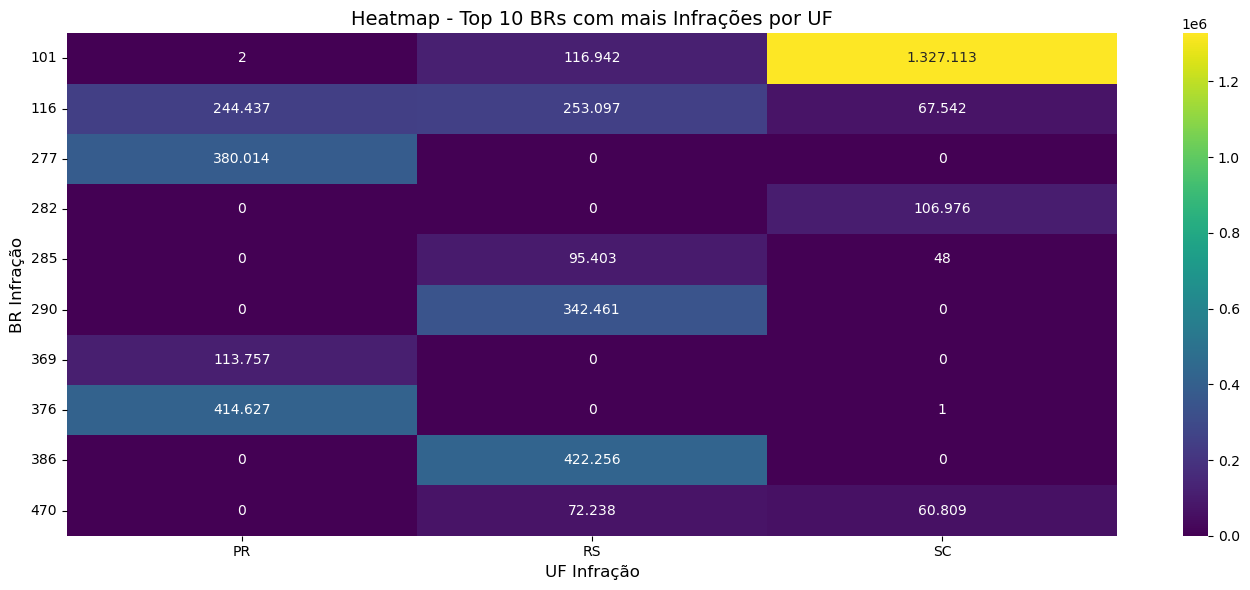

In [7]:
# Agrupamento por BR e UF
agrupado = df_2025_infra_01.groupby(['BR Infração', 'UF Infração']).size().reset_index(name='quantidade')

# Filtra as 10 BRs com mais infrações totais
top_brs = (
    agrupado.groupby('BR Infração')['quantidade']
    .sum()
    .nlargest(10)
    .index
)
filtrado = agrupado[agrupado['BR Infração'].isin(top_brs)]

# Pivot para o heatmap
pivot_df = filtrado.pivot(index='BR Infração', columns='UF Infração', values='quantidade').fillna(0)

# Criação da anotação como strings formatadas com separador de milhar
annot_labels = pivot_df.applymap(lambda x: f'{int(x):,}'.replace(',', '.'))

# Plot
plt.figure(figsize=(14, 6))
sns.heatmap(pivot_df, annot=annot_labels, fmt='', cmap='viridis')

plt.title('Heatmap - Top 10 BRs com mais Infrações por UF', fontsize=14)
plt.xlabel('UF Infração', fontsize=12)
plt.ylabel('BR Infração', fontsize=12)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# tipos de infrações

In [8]:
df_2025_infra_01['Descrição Abreviada Infração'].value_counts()

Descrição Abreviada Infração
Transitar em velocidade superior à máxima permitida em até 20%                      2374437
Transitar em velocidade superior à máxima permitida em mais de 20% até 50%           310607
Ultrapassar pela contramão linha de divisão de fluxos opostos, contínua amarela      143617
Deixar o condutor de usar o cinto segurança                                          138089
Conduzir o veículo registrado que não esteja devidamente licenciado                  110245
                                                                                     ...   
Deixar de dar preferência a pedestre port deficiência fís/criança/idoso/gestante          1
Parar sobre faixa de pedestres na mudança de sinal luminoso (fisc eletrônica)             1
Deixar de parar o veículo antes de transpor linha férrea                                  1
Conduzir motocicleta/motoneta/ciclomotor transportando pas. fora do assento               1
Estacionar nos túneis                              

In [10]:
df_2025_infra_01.head(100)

,Número do Auto,Data da Infração (DD/MM/AAAA),Indicador de Abordagem,Assinatura do Auto,Sentido Trafego,UF Infração,BR Infração,Km Infração,Município,Indicador Veiculo Estrangeiro,...,Código da Infração,Descrição Abreviada Infração,Enquadramento da Infração,Início Vigência da Infração,Fim Vigência Infração,Medição Infração,Hora Infração,Medição Considerada,Excesso Verificado,Qtd Infrações
3,a86157cf8d604d0,2022-01-21,C,N,D,PR,277,31,MORRETES,N,...,65992,Conduzir o veículo registrado que não esteja d...,230 * V,2016-11-01,NaN,Nenhuma,12,0,0,1.0
8,8e565c4243555a9,2022-01-08,C,N,C,SC,101,201,SAO JOSE,N,...,65992,Conduzir o veículo registrado que não esteja d...,230 * V,2016-11-01,NaN,Nenhuma,23,0,0,1.0
9,a26d27a20a4ea3c,2022-01-08,C,N,C,SC,101,201,SAO JOSE,N,...,67261,Conduzir o veículo em mau estado de conservaçã...,230 XVIII,2016-11-01,NaN,Nenhuma,23,0,0,1.0
10,f131795294dbd9b,2022-01-08,C,N,C,SC,101,201,SAO JOSE,N,...,50100,Dirigir veículo sem possuir CNH/PPD/ACC,162 I,2016-11-01,NaN,Nenhuma,23,0,0,1.0
11,58a83e16f086cf7,2022-01-08,C,S,C,PR,277,644,CEU AZUL,N,...,59670,Ultrapassar pela contramão linha de divisão de...,203 V,2016-11-01,NaN,Nenhuma,9,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1071,f0e941227f02d3d,2022-01-31,S,N,C,PR,376,297,MAUA DA SERRA,N,...,58350,Desobedecer às ordens emanadas da autorid comp...,195,2016-11-01,NaN,Nenhuma,8,0,0,1.0
1072,2c4cf50f8d5bfe5,2022-01-31,S,N,C,PR,369,155,LONDRINA,N,...,58350,Desobedecer às ordens emanadas da autorid comp...,195,2016-11-01,NaN,Nenhuma,8,0,0,1.0
1073,2449f2421e61e6a,2022-01-31,S,N,C,PR,376,297,MAUA DA SERRA,N,...,58350,Desobedecer às ordens emanadas da autorid comp...,195,2016-11-01,NaN,Nenhuma,8,0,0,1.0
1074,34899d450ae1a31,2022-01-31,S,N,C,PR,376,297,MAUA DA SERRA,N,...,58350,Desobedecer às ordens emanadas da autorid comp...,195,2016-11-01,NaN,Nenhuma,8,0,0,1.0


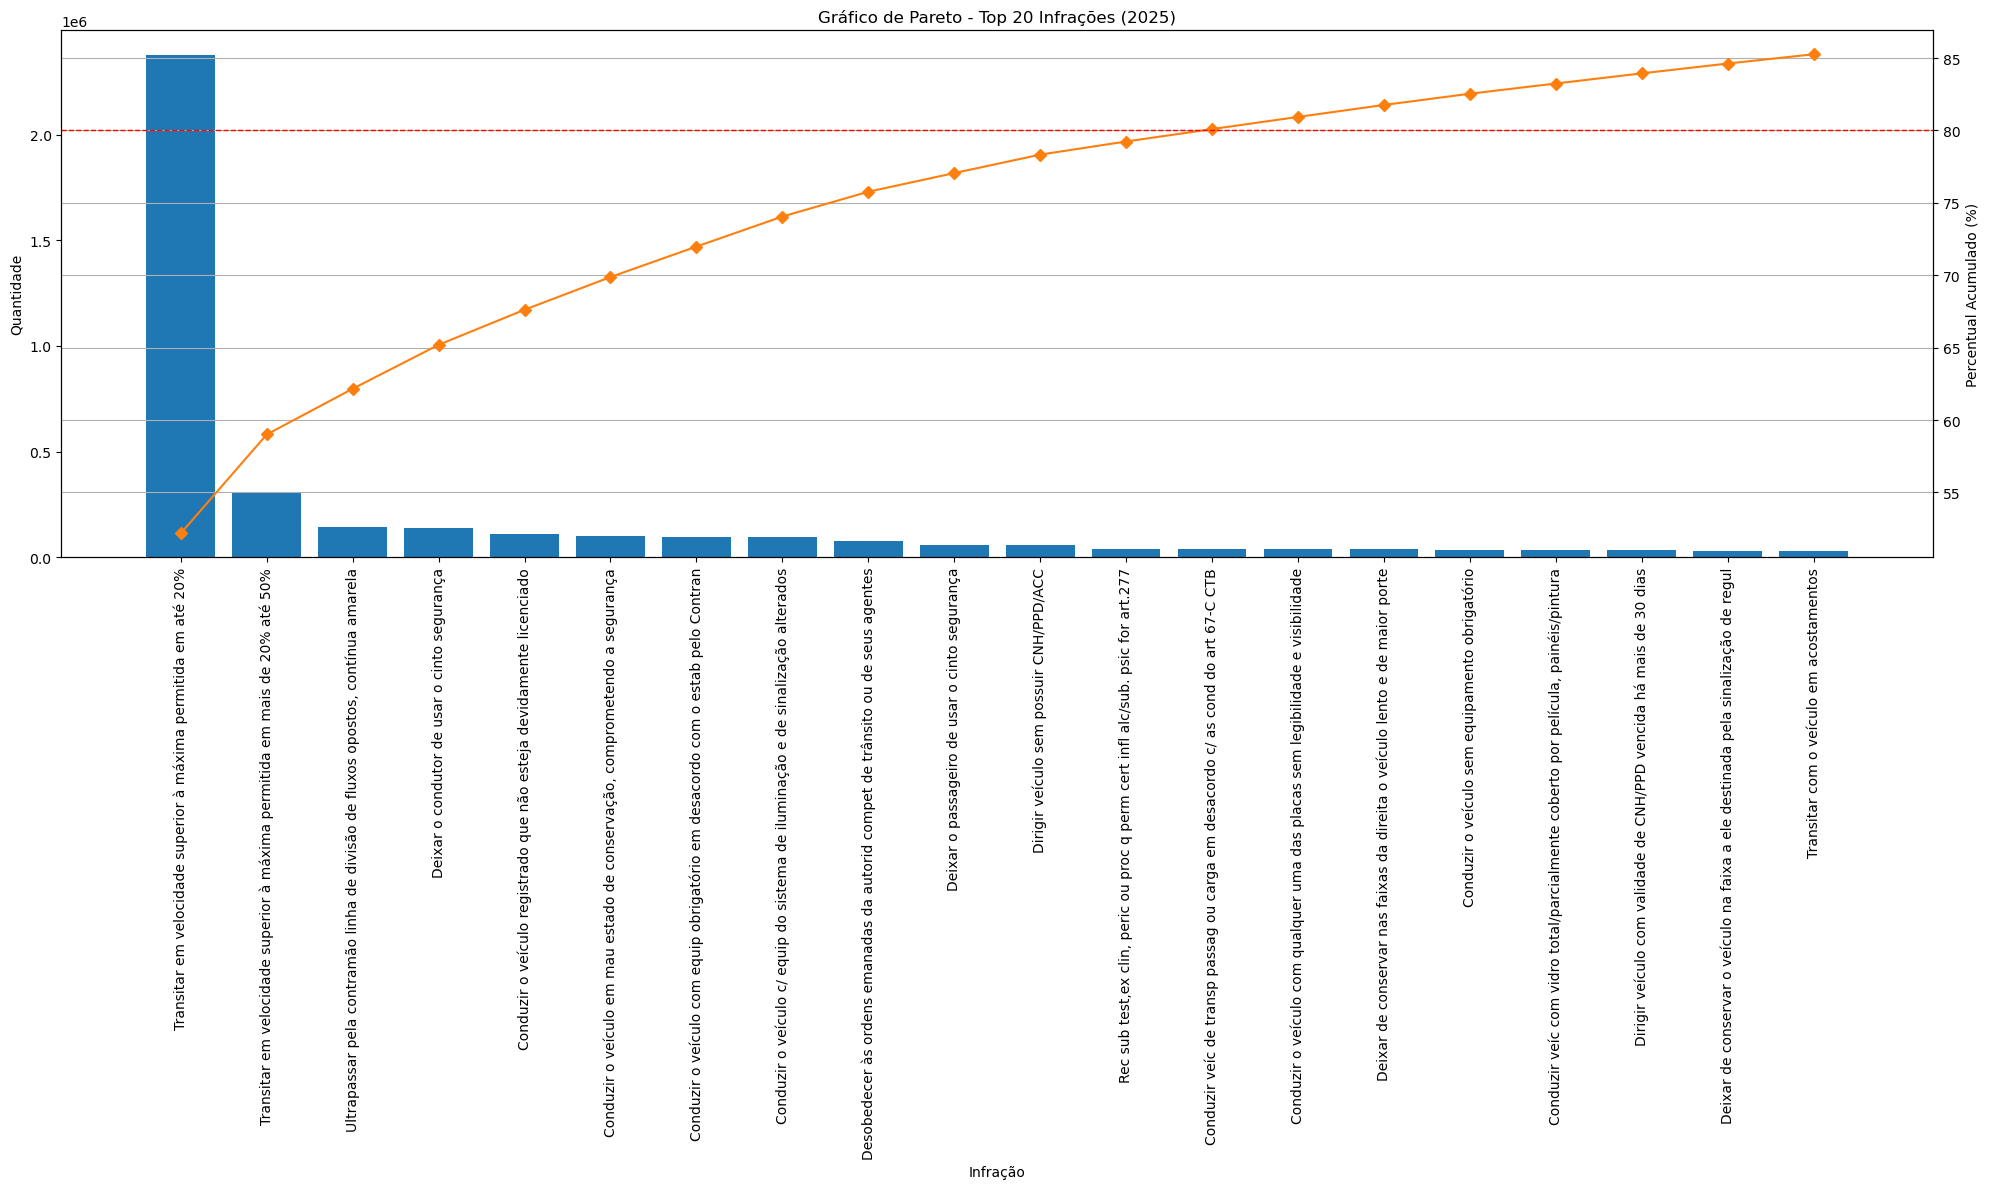

In [9]:
vc = df_2025_infra_01['Descrição Abreviada Infração'].value_counts()
pareto_df = vc.reset_index()
pareto_df.columns = ['Infração', 'quantidade']

pareto_df['percent'] = 100 * pareto_df['quantidade'] / pareto_df['quantidade'].sum()
pareto_df['percent_acumulado'] = pareto_df['percent'].cumsum()

pareto_top20 = pareto_df.head(20)

fig, ax = plt.subplots(figsize=(20, 12))

ax.bar(range(len(pareto_top20)), pareto_top20['quantidade'], color='C0')

ax2 = ax.twinx()
ax2.plot(range(len(pareto_top20)), pareto_top20['percent_acumulado'], color='C1', marker='D')
ax2.axhline(80, color='r', linestyle='--', linewidth=1)
ax2.set_ylabel('Percentual Acumulado (%)')

ax.set_xlabel('Infração')
ax.set_ylabel('Quantidade')
ax.set_title('Gráfico de Pareto - Top 20 Infrações (2025)')
ax.set_xticks(range(len(pareto_top20)))
ax.set_xticklabels(pareto_top20['Infração'], rotation=90)

plt.grid(axis='y')
plt.tight_layout()
plt.show()


C:\Users\adria\AppData\Local\Temp\ipykernel_12464\2881565241.py:9: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['Data da Infração'] = pd.to_datetime(df['Data da Infração (DD/MM/AAAA)'], dayfirst=True)


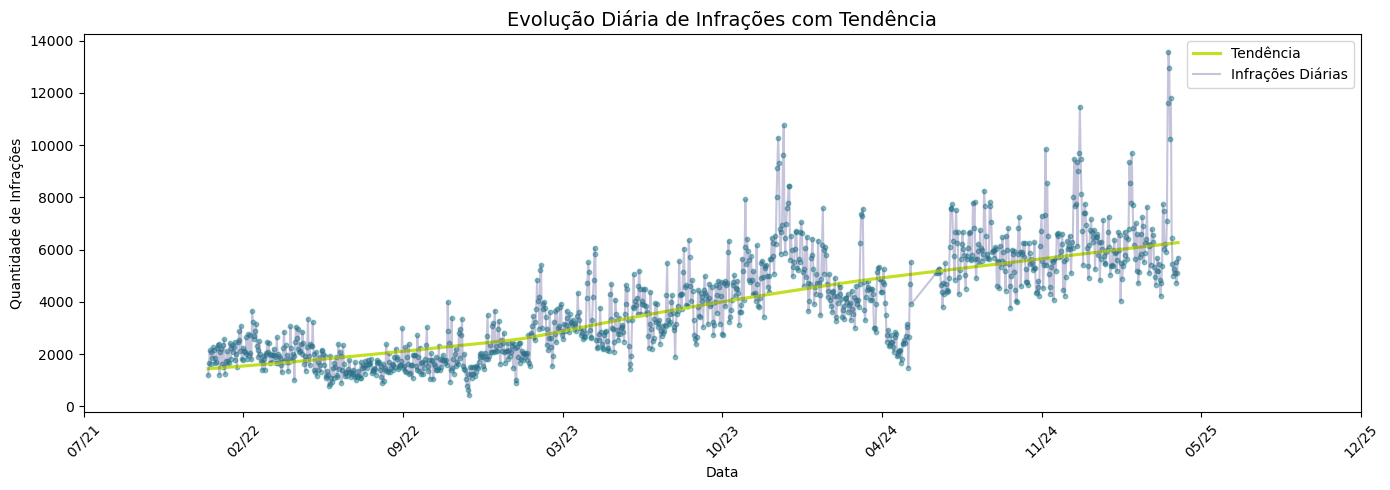

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Definir DataFrame
df = df_2025_infra_01

# Converter data
df['Data da Infração'] = pd.to_datetime(df['Data da Infração (DD/MM/AAAA)'], dayfirst=True)

# Agrupar por data
diario = df.groupby('Data da Infração')['Qtd Infrações'].sum()

# Resetar índice para usar com seaborn
diario_reset = diario.reset_index()

# Converter datas para valores numéricos (ordinais)
diario_reset['DataNum'] = diario_reset['Data da Infração'].map(pd.Timestamp.toordinal)

# Obter cores alternativas da paleta viridis
cores_viridis = sns.color_palette('viridis', n_colors=10)
cor_pontos = cores_viridis[4]     # mais clara
cor_linha = cores_viridis[1]      # tom médio
cor_tendencia = cores_viridis[9]  # mais escura

# Plot
plt.figure(figsize=(14, 5))
sns.regplot(
    x='DataNum',
    y='Qtd Infrações',
    data=diario_reset,
    lowess=True,
    scatter_kws={'s': 10, 'alpha': 0.5, 'color': cor_pontos},
    line_kws={'color': cor_tendencia, 'label': 'Tendência'}
)

plt.plot(
    diario_reset['DataNum'],
    diario_reset['Qtd Infrações'],
    alpha=0.3,
    label='Infrações Diárias',
    color=cor_linha
)

# Corrigir rótulos do eixo x usando Timestamp.fromordinal
ticks = plt.xticks()[0]
tick_labels = [pd.Timestamp.fromordinal(int(t)).strftime('%m/%y') for t in ticks]
plt.xticks(ticks, tick_labels, rotation=45)

plt.title('Evolução Diária de Infrações com Tendência', fontsize=14)
plt.xlabel('Data')
plt.ylabel('Quantidade de Infrações')
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\adria\AppData\Local\Temp\ipykernel_12464\4055917934.py:7: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['Data da Infração'] = pd.to_datetime(df['Data da Infração (DD/MM/AAAA)'], dayfirst=True)


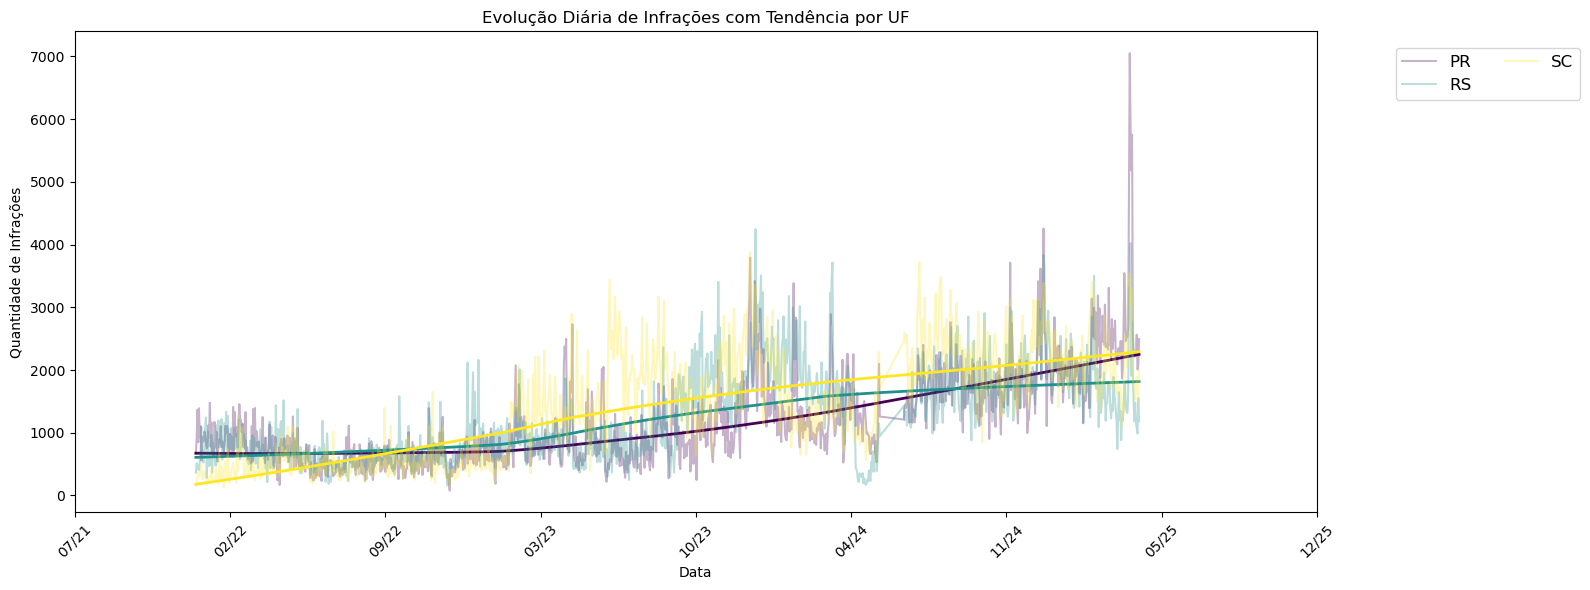

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  # para linspace

df = df_2025_infra_01.copy()
df['Data da Infração'] = pd.to_datetime(df['Data da Infração (DD/MM/AAAA)'], dayfirst=True)
diario_uf = df.groupby(['UF Infração', 'Data da Infração'])['Qtd Infrações'].sum().reset_index()
diario_uf['DataNum'] = diario_uf['Data da Infração'].map(pd.Timestamp.toordinal)

ufs = sorted(diario_uf['UF Infração'].unique())

# Pega N cores da paleta viridis, amostradas uniformemente
n_colors = len(ufs)
amostras = np.linspace(0, 1, n_colors)
cores = sns.color_palette("viridis", as_cmap=True)
cores_viridis_distintas = [cores(x) for x in amostras]

plt.figure(figsize=(16, 6))

for i, uf in enumerate(ufs):
    df_uf = diario_uf[diario_uf['UF Infração'] == uf]
    plt.plot(df_uf['DataNum'], df_uf['Qtd Infrações'], alpha=0.3, label=f'{uf}', color=cores_viridis_distintas[i])
    sns.regplot(
        x='DataNum',
        y='Qtd Infrações',
        data=df_uf,
        lowess=True,
        scatter=False,
        line_kws={'label': f'{uf} - Tendência', 'color': cores_viridis_distintas[i], 'linewidth': 2}
    )

ticks = plt.xticks()[0]
tick_labels = [pd.Timestamp.fromordinal(int(t)).strftime('%m/%y') for t in ticks]
plt.xticks(ticks, tick_labels, rotation=45)

plt.title('Evolução Diária de Infrações com Tendência por UF')
plt.xlabel('Data')
plt.ylabel('Quantidade de Infrações')

plt.legend(
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    fontsize=12,
    ncol=2,
    borderaxespad=1.0,
    frameon=True
)

plt.tight_layout()
plt.show()
